In [22]:
#ML training example
#The data represents salary of workers and their experience in the field. There are various
#What would be the best fit for a method for supervised learning model(do not overthink!)? Random Forest Regression? lets do Decision tree Regressor first, then we will find out.
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
df = pd.read_csv('Experience-Salary-clean.csv')
df
#Showing dataframe

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236
...,...,...
995,22.161741,24.666502
996,32.266497,24.160270
997,17.039030,19.903797
998,25.222124,21.974413


In [26]:
#Divide the data into two parts
X = df[['exp(in months)']]
y = df['salary(in thousands)']
#Learning model
model = DecisionTreeRegressor()
model.fit(X, y)

DecisionTreeRegressor()

In [45]:
#Now we are marking a prediction
prediction_input = pd.DataFrame([[10], [60], [5], [2]], columns=['exp(in months)'])
# predictions = model.predict([[60], [5]]) warning 
predictions = model.predict(prediction_input)
predictions
# Error with 5 and 2 =  Decision Tree Regressor is overfitting or not generalizing well to the data, lets try other algorithm

array([ 9.15244873, 44.84956608, 18.68699002, -0.07456295])

In [46]:
from sklearn.ensemble import RandomForestRegressor
# Random forest with 100 trees
model = RandomForestRegressor(n_estimators=100) 
model.fit(X, y)
predictions = model.predict([[5], [10], [2]])
predictions

C:\Users\Winia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([17.96666603,  9.30049689,  1.75610379])

<Axes: xlabel='salary(in thousands)'>

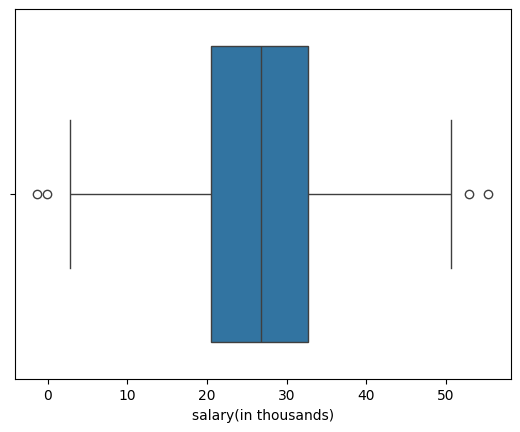

In [51]:
#Checking outliers
import seaborn as sns
sns.boxplot(x=df['salary(in thousands)'])

In [49]:
# Limiting tree depth improved the results slightly 
model = DecisionTreeRegressor(max_depth=5)  
model.fit(X, y)
predictions = model.predict([[5], [10], [2]])
print(predictions)

[13.15420834  9.4996531   1.39090219]


C:\Users\Winia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [55]:
#Trying to fix warnings
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
df = pd.read_csv('Experience-Salary-clean.csv')

X = df[['exp(in months)']]  # Must be a DataFrame (2D)
y = df['salary(in thousands)']  # Must be a Series (1D)

#Random Forest with controlled depth to prevent overfitting
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X, y)

#Making sure that input for prediction has feature names (DataFrame format)
prediction_input = pd.DataFrame([[5], [10], [2]], columns=['exp(in months)'])
predictions = model.predict(prediction_input)
predictions

#Got the best results so far

array([14.47261159, 11.59154748,  4.84588025])

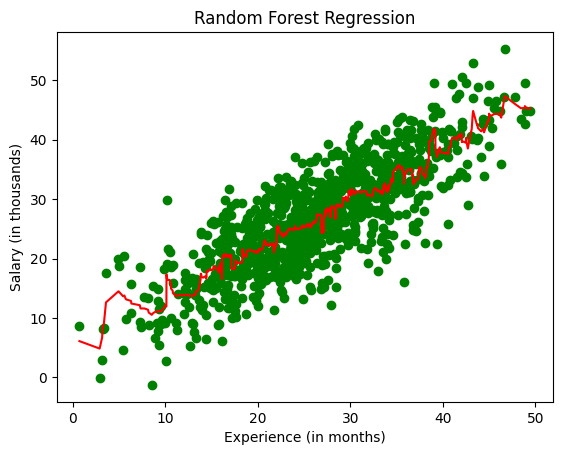

In [68]:
#Let's find out why do we have higher salary for 5 months of experience vs 10 months
import matplotlib.pyplot as plt

# Scatter plot of experience vs salary
plt.scatter(df['exp(in months)'], df['salary(in thousands)'], color='green')

# Sort X values for better visualization
sorted_X = X.sort_values(by='exp(in months)')
sorted_predictions = model.predict(sorted_X)

# Plot the models predictions as a line
plt.plot(sorted_X, sorted_predictions, color='red', label='Model Prediction')

plt.xlabel('Experience (in months)')
plt.ylabel('Salary (in thousands)')
plt.title('Random Forest Regression')
plt.show()

In [71]:
#Lets use linear regression model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Load dataset
df = pd.read_csv('Experience-Salary-clean.csv')

#Prepare data (Ensure X is a DataFrame and y is a Series)
X = df[['exp(in months)']]  # Feature
y = df['salary(in thousands)']  # Target

#Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

#Make predictions
prediction_input = pd.DataFrame([[5], [10]], columns=['exp(in months)'])
predictions = linear_model.predict(prediction_input)

print(f"Predicted salary for 5 months: {predictions[0]:.2f}k")
predictions[1]
#How to make it look good?

Predicted salary for 5 months: 9.31k


np.float64(13.427185182017698)

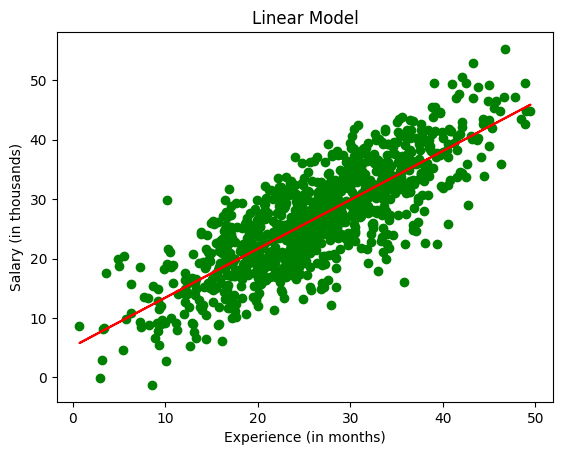

In [66]:
# Scatter plot of the data with Linear Regression shows why it is the best Model for this task
plt.scatter(X, y, color='green')
plt.plot(X, linear_model.predict(X), color='red', label='Linear Regression')

plt.xlabel('Experience (in months)')
plt.ylabel('Salary (in thousands)')
plt.title('Linear Model')
plt.show()

In [89]:
#Now the question is how to test the accuracy of the results? What kind of dataset would be better than this one?
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#To delete l8r
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

#Load dataset
df = pd.read_csv('Experience-Salary-clean.csv')
X = df[['exp(in months)']]  # Feature
y = df['salary(in thousands)']  # Target 

#This function returns tuple: train_test_split(X, y, test_size=0.2) therefore we need to add something at the begining. What?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#This time we will use dataset from within the range.
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
#How do they look like? How many rows do they have? Are they in order?
X_train

,exp(in months)
136,24.079932
188,18.845693
117,23.560013
132,29.120267
808,24.148215
...,...
928,26.740421
668,27.679417
350,21.616770
186,44.299530


In [83]:
prediction_input = pd.DataFrame([[5], [10], [15], [16], [25]], columns=['exp(in months)'])
predictions = linear_model.predict(prediction_input)
print(predictions)

[ 9.51966617 13.61834081 17.71701546 18.53675038 25.91436474]


In [85]:
#Nope
prediction_input = pd.DataFrame(X_test, columns=['exp(in months)'])
predictions = linear_model.predict(prediction_input)
print(predictions)

[12.53127356 32.65967862 30.35109993 29.03702018 28.0212033  19.74677556
 21.78777668 27.416757   35.62280954 19.01723822 25.52099272 45.62496503
 18.40098811 34.94966193 26.23661815 14.70353062 31.46858508 14.28325524
 23.69065148 23.3774569  35.25241898 38.10455971 31.9946779  20.60182153
 37.39138645 26.97981934 20.95611126 37.52745571 45.13466975 33.30019365
 17.64308317 21.53148685 19.75136278 40.28573647 15.69428892 27.71689288
 30.2026624  36.89259639 30.00112592 25.4001153  33.11341911 25.97308413
 19.45694901 31.51267573 25.48921333 33.77079396 21.88646892 18.88305306
 26.1218221  27.34104898 23.44523518 26.46268227 16.3195614  33.38960078
 21.73593165 39.9347883  27.80035859 40.77021422 28.54178883 35.96559891
 27.3061443  27.78840728 23.67954627 22.37157882 31.17842484 28.24200227
 38.06730145 28.59537225 23.67375728 31.15018683 24.73395672 24.02230386
 27.28104307 25.41329647  8.3455916  23.14101266 37.9425379  31.81742159
 11.40896063 22.37279457 30.34193853 37.66727669 26

In [91]:
#Now we need to compare the results we have with the actual value we have in y_test; for this we need import sklearn.metrics import accuracy_score
mae = mean_absolute_error(y_test, predictions)
#Mean Absolute Error (MAE): Measures the average of the absolute differences between predicted and actual values.
mse = mean_squared_error(y_test, predictions)
#Mean Squared Error (MSE): Measures the average of the squared differences between predicted and actual values.
rmse = np.sqrt(mse)
#Root Mean Squared Error (RMSE): The square root of the MSE, which provides error in the same units as the target variable.
r2 = r2_score(y_test, predictions)
#R-squared (R²): Represents how well the model fits the data. R² ranges from 0 to 1, with 1 indicating perfect predictions.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
#What do you understand from the results?



#MAE 9.609733012732297, on average, model’s predictions are off by approximately 9.61 thousand units (e.g., salary). A lower MAE would indicate better or worse accuracy?
#MSE is another measure of error, but it gives more weight to larger errors. It’s useful for assessing models that need to minimize large errors.
#RMSE model's predictions are off by an average of 11.78 thousand dollars
#R² is the most important metric. A negative R² value means what???                                    It means that the model is performing worse than a basic mean-based model (which would have an R² of 0). The model might be overfitting or not capturing the underlying pattern of the data well. A higher R² (closer to 1) would indicate a better model.

Mean Absolute Error: 9.609733012732297
Mean Squared Error: 138.81752448581636
Root Mean Squared Error: 11.782084895544436
R-squared: -0.8020281954788477


In [92]:
#Basic Mean Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mean_salary = y.mean()  # Calculate the mean salary
mean_predictions = np.full_like(y, mean_salary)

# Evaluate the model performance
mae = mean_absolute_error(y, mean_predictions)
mse = mean_squared_error(y, mean_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y, mean_predictions)

# Print the results
print(f"Mean Salary: {mean_salary:.2f}k")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
#I mamy rozwiazanie

Mean Salary: 26.72k
Mean Absolute Error: 7.06
Mean Squared Error: 78.15
Root Mean Squared Error: 8.84
R-squared: 0.00
